In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [ ]:
#Mount Gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Set current working directory
%cd /content/drive/My Drive/DL/

[Errno 2] No such file or directory: '/content/drive/My Drive/DL/'
/content


In [ ]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical


In [ ]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :


    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img))
            y.append(label)
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect()
    return X,y, label, label_names

In [ ]:
X,y,Nombre_classes,Classes = lire_images("../DL/archive/chest_xray/train", 224, 224, 1000)

PNEUMONIA
1001  images lues
NORMAL
1001  images lues


In [ ]:
Nombre_classes

2

In [ ]:
Classes

['PNEUMONIA', 'NORMAL']

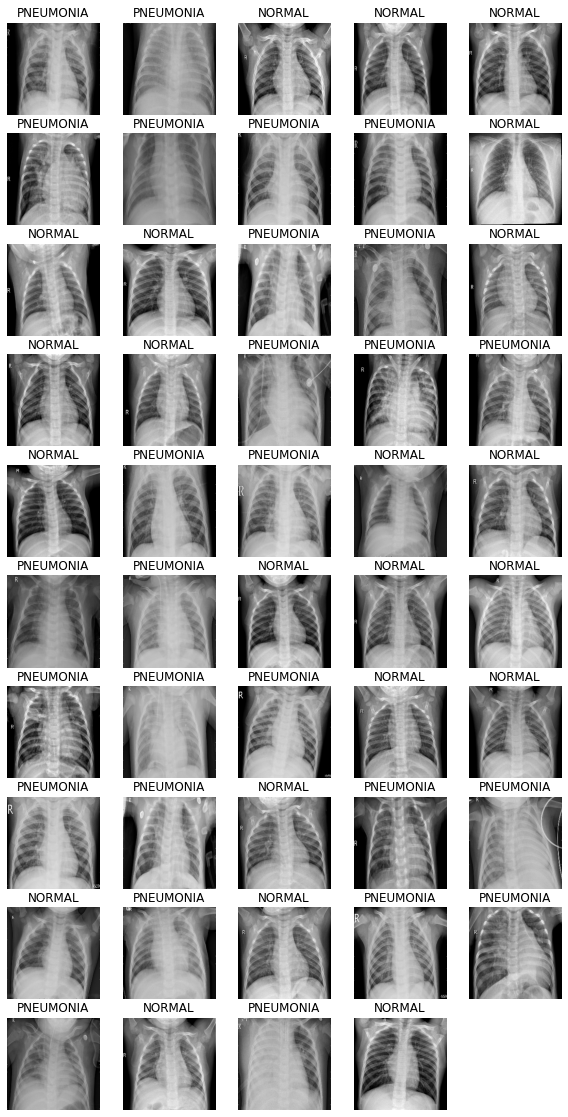

In [ ]:
import random
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])

In [ ]:
y = to_categorical(y)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
X.shape

(2002, 224, 224, 3)

In [ ]:
# Normalisation entre 0 et 1
X = X / 255
print(X[0][0])

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.02352941 0.02352941 0.02352941]
 [0.05490196 0.05490196 0.05490196]
 [0.09411765 0.09411765 0.09411765]
 [0.12941176 0.12941176 0.12941176]
 [0.16470588 0.16470588 0.16470588]
 [0.18823529 0.18823529 0.18823529]
 [0.18431373 0.18431373 0.18431373]
 [0.20784314 0.20784314 0.20784314]
 [0.20392157 0.20392157 0.20392157]
 [0.22352941 0.22352941 0.22352941]
 [0.23921569 0.23921569 0.23921569]
 [0.22352941 0.22352941 0.22352941]
 [0.22745098 0.22745098 0.22745098]
 [0.24705882 0.24705882 0.24705882]
 [0.24705882 0.24705882 0.24705882]
 [0.25882353 0.25882353 0.25882353]
 [0.2627451  0.2627451  0.2627451 ]
 [0.25098039 0.25098039 0.25098039]
 [0.2745098  0.2745098  0.2745098 ]
 [0.29803922 0.29803922 0.29803922]
 [0.29019608 0.29019608 0.29019608]
 [0.32156863 0.32156863 0.32

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
del X,y

In [ ]:

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation of model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 flatten_2 (Flatten)         (None, 1548800)           0         
                                                                 
 dense_2 (Dense)             (None, 2)                 3097602   
                                                                 
Total params: 3,100,034
Trainable params: 3,100,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
57/57 [==============================] - 61s 1s/step - loss: 5.4460 - accuracy: 0.7907 - val_loss: 0.2016 - val_accuracy: 0.9453
Epoch 2/20
57/57 [==============================] - 56s 984ms/step - loss: 0.1239 - accuracy: 0.9584 - val_loss: 0.1512 - val_accuracy: 0.9602
Epoch 3/20
57/57 [==============================] - 56s 979ms/step - loss: 0.0622 - accuracy: 0.9845 - val_loss: 0.1147 - val_accuracy: 0.9502
Epoch 4/20
57/57 [==============================] - 55s 959ms/step - loss: 0.0319 - accuracy: 0.9928 - val_loss: 0.1164 - val_accuracy: 0.9453
Epoch 5/20
57/57 [==============================] - 55s 972ms/step - loss: 0.0129 - accuracy: 0.9994 - val_loss: 0.1035 - val_accuracy: 0.9801
Epoch 6/20
57/57 [==============================] - 55s 969ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0964 - val_accuracy: 0.9652
Epoch 7/20
57/57 [==============================] - 55s 966ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9502
Ep

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 98.51%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

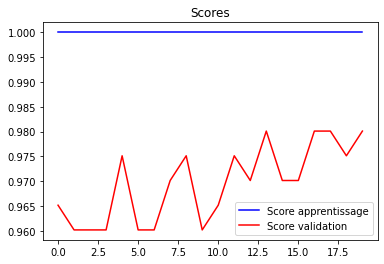

In [ ]:
plot_scores(train)

In [ ]:
# Prediction
# y_cnn = model.predict_classes(X_test)
y_cnn = model.predict(X_test)
y_cnn = np.argmax(y_cnn,axis=-1)

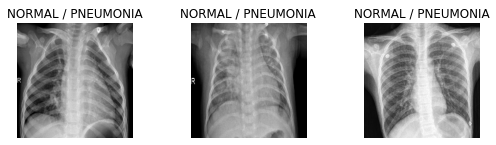

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j].argmax(axis=-1)]))
        i+=1

In [ ]:
#CNN

In [ ]:
# Modèle CNN plus profond
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 20)      5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)       

In [ ]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/50
57/57 [==============================] - 105s 2s/step - loss: 0.5318 - accuracy: 0.7046 - val_loss: 0.2738 - val_accuracy: 0.9104
Epoch 2/50
57/57 [==============================] - 104s 2s/step - loss: 0.2654 - accuracy: 0.8917 - val_loss: 0.2044 - val_accuracy: 0.9552
Epoch 3/50
57/57 [==============================] - 104s 2s/step - loss: 0.1737 - accuracy: 0.9373 - val_loss: 0.1684 - val_accuracy: 0.9502
Epoch 4/50
57/57 [==============================] - 108s 2s/step - loss: 0.1346 - accuracy: 0.9539 - val_loss: 0.1083 - val_accuracy: 0.9751
Epoch 5/50
57/57 [==============================] - 105s 2s/step - loss: 0.1145 - accuracy: 0.9561 - val_loss: 0.1154 - val_accuracy: 0.9751
Epoch 6/50
57/57 [==============================] - 106s 2s/step - loss: 0.1067 - accuracy: 0.9634 - val_loss: 0.1072 - val_accuracy: 0.9652
Epoch 7/50
57/57 [==============================] - 107s 2s/step - loss: 0.0955 - accuracy: 0.9634 - val_loss: 0.1041 - val_accuracy: 0.9751
Epoch 8/50
57

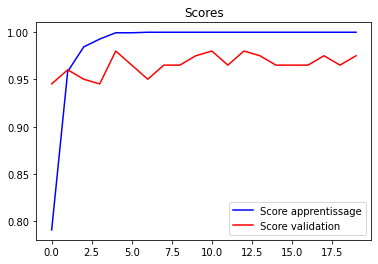

In [ ]:
plot_scores(train)

In [ ]:
model.save('mnist_cnn2.h5')

In [ ]:
new_model = load_model('mnist_cnn2.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 flatten (Flatten)           (None, 1548800)           0         
                                                                 
 dense (Dense)               (None, 2)                 3097602   
                                                                 
Total params: 3,100,034
Trainable params: 3,100,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 98.01%


In [ ]:
#Transfer learning

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation of module
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
57/57 [==============================] - 67s 1s/step - loss: 5.6579 - accuracy: 0.7274 - val_loss: 0.9365 - val_accuracy: 0.5522
Epoch 2/20
57/57 [==============================] - 65s 1s/step - loss: 0.3096 - accuracy: 0.8812 - val_loss: 0.3281 - val_accuracy: 0.8557
Epoch 3/20
57/57 [==============================] - 65s 1s/step - loss: 0.1947 - accuracy: 0.9378 - val_loss: 0.1836 - val_accuracy: 0.9303
Epoch 4/20
57/57 [==============================] - 64s 1s/step - loss: 0.0899 - accuracy: 0.9811 - val_loss: 0.1249 - val_accuracy: 0.9552
Epoch 5/20
57/57 [==============================] - 65s 1s/step - loss: 0.0399 - accuracy: 0.9933 - val_loss: 0.1258 - val_accuracy: 0.9552
Epoch 6/20
57/57 [==============================] - 65s 1s/step - loss: 0.0286 - accuracy: 0.9950 - val_loss: 0.0897 - val_accuracy: 0.9751
Epoch 7/20
57/57 [==============================] - 64s 1s/step - loss: 0.0125 - accuracy: 0.9994 - val_loss: 0.0935 - val_accuracy: 0.9701
Epoch 8/20
57/57 [==

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 48.26%


In [ ]:
for i in range (len(vgg16.layers)):
    print (i,vgg16.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7f32346751d0>
1 <keras.layers.convolutional.Conv2D object at 0x7f329de35b50>
2 <keras.layers.convolutional.Conv2D object at 0x7f3233db4250>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f322ab027d0>
4 <keras.layers.convolutional.Conv2D object at 0x7f32260cf790>
5 <keras.layers.convolutional.Conv2D object at 0x7f32260d2f50>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f32260d7a90>
7 <keras.layers.convolutional.Conv2D object at 0x7f32260df1d0>
8 <keras.layers.convolutional.Conv2D object at 0x7f32260e9110>
9 <keras.layers.convolutional.Conv2D object at 0x7f32260df690>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f32260f1650>
11 <keras.layers.convolutional.Conv2D object at 0x7f32260f2e90>
12 <keras.layers.convolutional.Conv2D object at 0x7f322607b810>
13 <keras.layers.convolutional.Conv2D object at 0x7f32260ecd50>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f322607fb90>
15 <keras.layers.convolutional.Conv2D object at 

In [ ]:
for layer in vgg16.layers[15:]:
    layer.trainable=True
for layer in vgg16.layers[0:15]:
    layer.trainable=False

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation of module
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
57/57 [==============================] - 73s 1s/step - loss: 4.1647e-04 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9801
Epoch 2/20
57/57 [==============================] - 70s 1s/step - loss: 4.0692e-04 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9900
Epoch 3/20
57/57 [==============================] - 68s 1s/step - loss: 3.0342e-04 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9900
Epoch 4/20
57/57 [==============================] - 68s 1s/step - loss: 2.8473e-04 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9900
Epoch 5/20
57/57 [==============================] - 68s 1s/step - loss: 2.6958e-04 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9851
Epoch 6/20
57/57 [==============================] - 70s 1s/step - loss: 2.3372e-04 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9900
Epoch 7/20
57/57 [==============================] - 69s 1s/step - loss: 2.2656e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy:

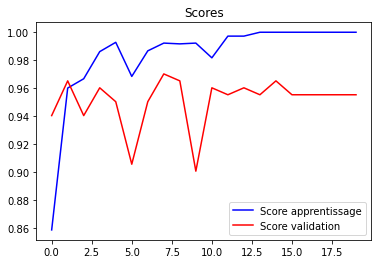

In [ ]:
plot_scores(train)

In [ ]:
y_cnn = model.predict(X_test)
y_cnn = np.argmax(y_cnn,axis=-1)

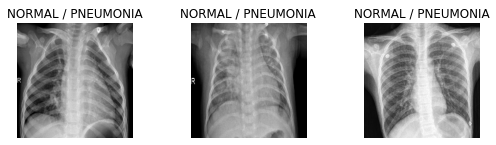

In [ ]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j].argmax(axis=-1)]))
        i+=1

In [ ]:
from tensorflow.keras.applications import InceptionV3, ResNet50V2

In [ ]:
resnet = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet.trainable = False
resnet.layers[0].trainable = True

In [ ]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation of module
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
57/57 [==============================] - 314s 5s/step - loss: 0.7454 - accuracy: 0.9406 - val_loss: 0.1573 - val_accuracy: 0.9851
Epoch 2/20
57/57 [==============================] - 305s 5s/step - loss: 0.1928 - accuracy: 0.9761 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 3/20
57/57 [==============================] - 306s 5s/step - loss: 0.0643 - accuracy: 0.9906 - val_loss: 0.1655 - val_accuracy: 0.9851
Epoch 4/20
57/57 [==============================] - 293s 5s/step - loss: 0.0409 - accuracy: 0.9917 - val_loss: 0.1001 - val_accuracy: 0.9851
Epoch 5/20
57/57 [==============================] - 299s 5s/step - loss: 0.1056 - accuracy: 0.9906 - val_loss: 0.2956 - val_accuracy: 0.9801
Epoch 6/20
57/57 [==============================] - 289s 5s/step - loss: 0.0179 - accuracy: 0.9978 - val_loss: 0.1622 - val_accuracy: 0.9851
Epoch 7/20
57/57 [==============================] - 290s 5s/step - loss: 0.0220 - accuracy: 0.9983 - val_loss: 0.1333 - val_accuracy: 0.9751
Epoch 8/20
57

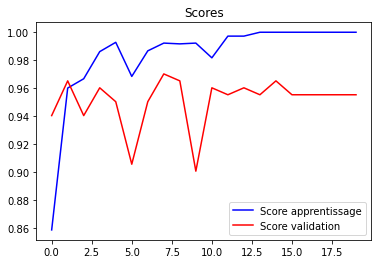

In [ ]:
plot_scores(train)

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
inception.trainable = False
inception.layers[0].trainable = True

In [ ]:
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
57/57 [==============================] - 222s 4s/step - loss: 2.4114 - accuracy: 0.8584 - val_loss: 0.3935 - val_accuracy: 0.9403
Epoch 2/20
57/57 [==============================] - 214s 4s/step - loss: 0.2690 - accuracy: 0.9600 - val_loss: 0.1455 - val_accuracy: 0.9652
Epoch 3/20
57/57 [==============================] - 212s 4s/step - loss: 0.1543 - accuracy: 0.9667 - val_loss: 0.5269 - val_accuracy: 0.9403
Epoch 4/20
57/57 [==============================] - 212s 4s/step - loss: 0.0666 - accuracy: 0.9861 - val_loss: 0.1445 - val_accuracy: 0.9602
Epoch 5/20
57/57 [==============================] - 211s 4s/step - loss: 0.0199 - accuracy: 0.9928 - val_loss: 0.1377 - val_accuracy: 0.9502
Epoch 6/20
57/57 [==============================] - 212s 4s/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 0.6718 - val_accuracy: 0.9055
Epoch 7/20
57/57 [==============================] - 212s 4s/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.2681 - val_accuracy: 0.9502
Epoch 8/20
57

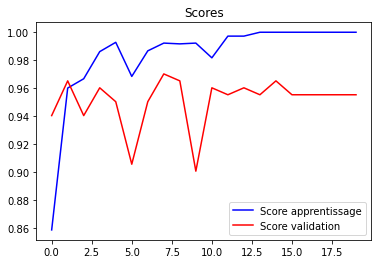

In [ ]:
plot_scores(train)